> # 2 지도학습

- 전체 내용 최하단에 정리

## 2.1 분류와 회귀

## 2.2 일반화, 과대적합, 과소적합

### 2.2.1 모델 복잡도와 데이터셋 크기의 관계

## 2.3 지도 학습 알고리즘

### 2.3.1 예제에 사용할 데이터셋

X.shape: (26, 2)


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


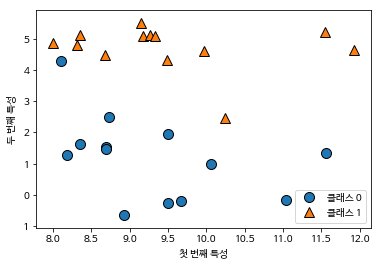

In [4]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫 번째 특성")

plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, '타깃')

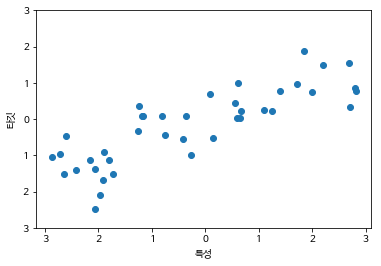

In [5]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(type(cancer))
print("cancer.keys(): \n{}".format(cancer.keys()))

<class 'sklearn.utils.Bunch'>
cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
print("유방암 데이터 형태: {}".format(cancer.data.shape))

print("클래스별 샘플 개수:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

유방암 데이터 형태: (569, 30)
클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}


In [8]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

데이터의 형태: (506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### 2.3.2 k-최근접 이웃

#### k-최근접 이웃 분류

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


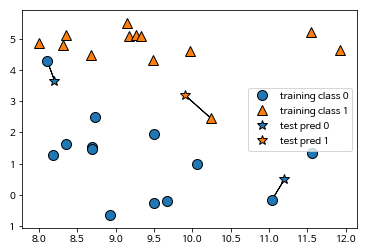

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


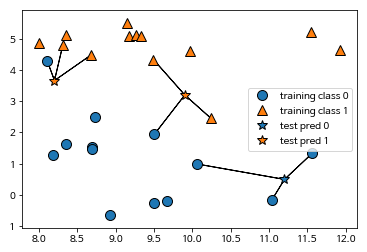

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [16]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


#### KNeighborsClassifier 분석

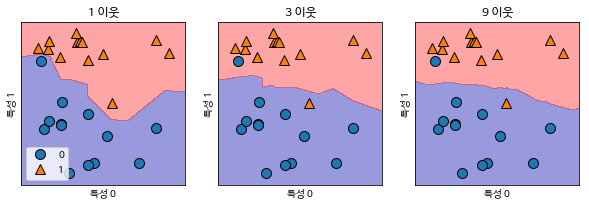

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in  zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax,
                                   alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc = 3)

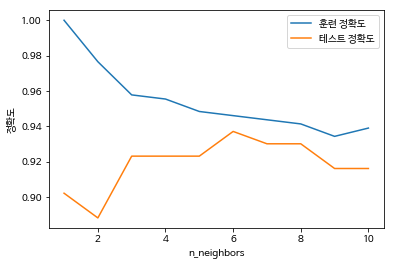

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = "훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label = "테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

#### k-최근접 이웃 회귀

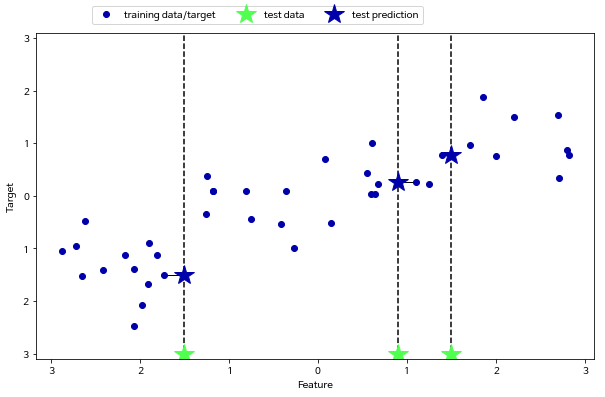

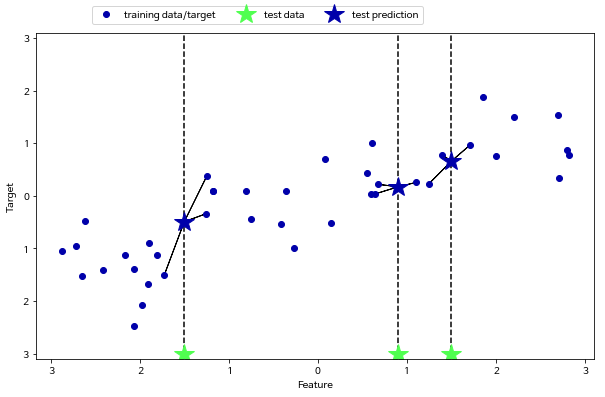

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [21]:
print("테스트 세트 예측: \n{}".format(reg.predict(X_test)))
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


#### KNeighborsRegressor 분석

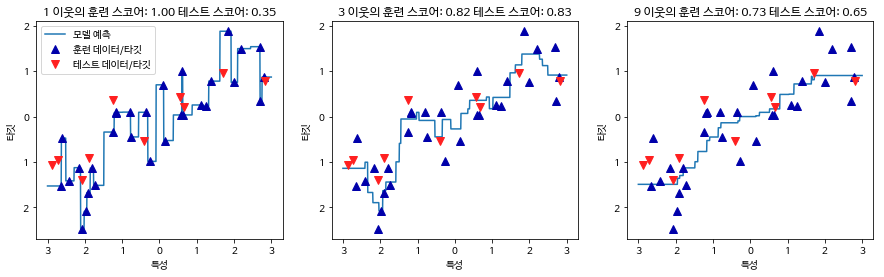

In [22]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title(
    "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(n_neighbors, reg.score(X_train, y_train),
                                                  reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")

axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc = "best")

#### 장단점과 매개변수

### 2.3.3 선형 모델

#### 회귀의 선형 모델

w[0]: 0.393906  b: -0.031804


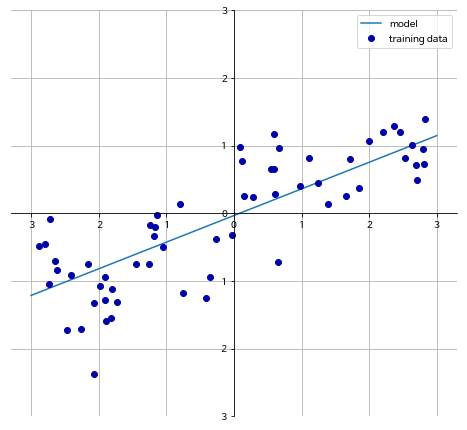

In [23]:
mglearn.plots.plot_linear_regression_wave()

#### 선형 회귀(최소제곱법)

In [24]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [25]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [26]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
훈련 세트 점수: 0.66


In [27]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [28]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
훈련 세트 점수: 0.61


#### 릿지 회귀

In [29]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
훈련 세트 점수: 0.75


In [30]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.79
훈련 세트 점수: 0.64
훈련 세트 점수: 0.93
훈련 세트 점수: 0.77


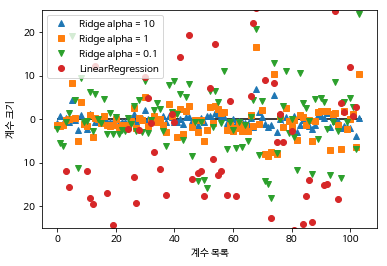

In [31]:
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

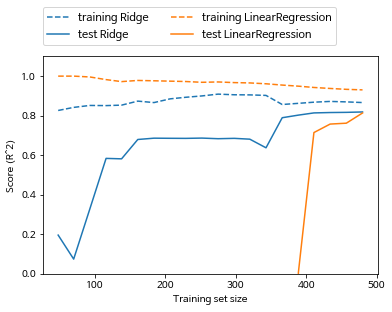

In [32]:
mglearn.plots.plot_ridge_n_samples()

#### 라쏘

In [33]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


In [34]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


In [35]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 96


Text(0, 0.5, '계수 크기')

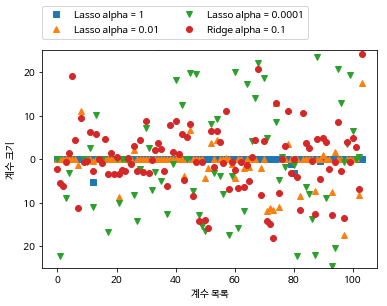

In [36]:
plt.plot(lasso.coef_, 's', label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")
plt.legend(ncol = 2, loc = (0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

#### 분류용 선형 모델

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


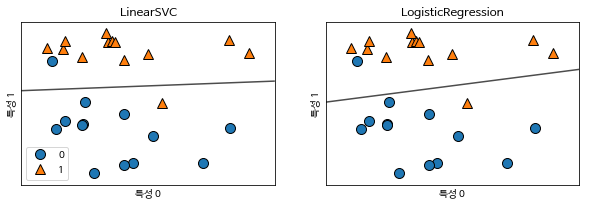

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5,
                                   ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

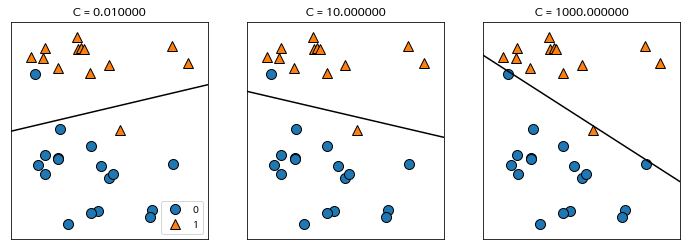

In [38]:
mglearn.plots.plot_linear_svc_regularization()

In [40]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.972
테스트 세트 점수: 0.965


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


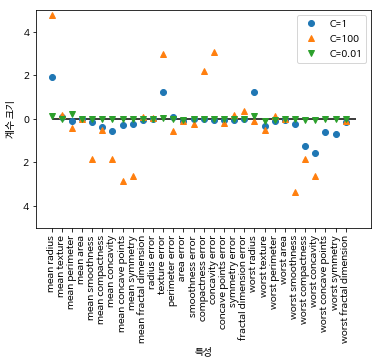

In [45]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

#### 다중 클래스 분류용 선형 모델

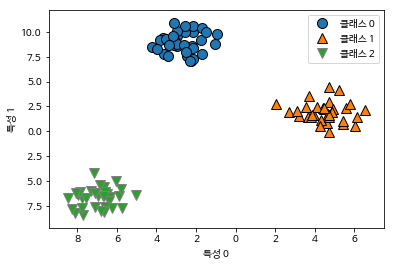

In [48]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [49]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


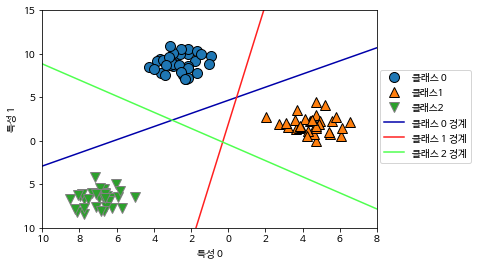

In [52]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스1', '클래스2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

Text(0, 0.5, '특성1')

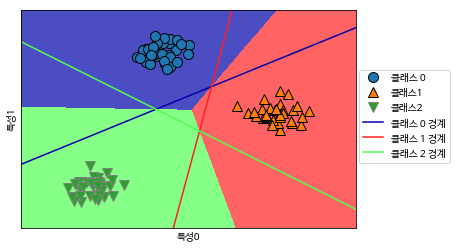

In [55]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha =.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스1', '클래스2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성0")
plt.ylabel("특성1")

#### 장단점과 매개변수

# 2 지도 학습

## 2.1 분류와 회귀

### 1) 분류

① 이진 분류 
- 스팸 메일 분류
- 클래스를 "양성 / 음성"으로 나누기도 한다.

② 다중 분류

### 2) 회귀
- 연간 소득 예측, 수확량 예측
- 연속성을 띄는 부동소수점수(실수) 예측

## 2.2 일반화, 과대적합, 과소적합

### 1) 일반화
- 모델이 처음 보는 데이터에 대해 정확하게 예측
- 훈련 세트에서 테스트 세트로 일반화 되었다고 함

### 2) 과대적합(Overfitting)
- 일반적으로 간단한 모델일 경우, 일반화가 쉽기 때문에 선호하게 됨
- 가진 정보를 모두 사용하여 복잡한 모델을 만들 경우 일반화가 어려워지고 과대적합

### 3) 과소적합(underfitting)
- 모델이 너무 간단하여 데이터의 면면과 다양성을 잡아내지 못함
- 결과적으로 너무 간단한 모델로 인해 일반화가 힘든 경우

### 4) 일반화 성능이 최대가 되는 모델을 찾아야 함

※ 2.2.1 모델 복잡도와 데이터셋 크기의 관계
- 데이터가 많을수록 과대적합 없이 더 복잡한 모델 만들 수 있음
- 데이터의 중복이나 비슷한 데이터를 모으는 것은 도움되지 않음

## 2.3 지도 학습 알고리즘

### 1) k-NN

① k-NN 분류
- 이웃의 수를 많을수록 결정 경계 부드러워짐 -> 단순한 모델
- 이웃의 수가 적을수록 모델의 복잡도 높아짐

② k-NN 회귀
- 이웃 간의 평균으로 예측
- 일반 회귀 모델에서 처럼 예측의 적합도를 R^2로 계산 가능

③ 장단점과 매개변수
- 중요한 매개변수는 2개 (거리를 재는 방법, 이웃의 수)
- 이해하기 쉬운 모델
- 훈련 세트가 크면 예측이 느려짐
- 많은 특성을 가진 데이터셋에 잘 작동하지 않음
- 특성 값 대부분이 0인 데이터셋에 잘 작동하지 않음
- 현업에서 잘 사용하지 않음

### 2) 선형 모델

① 선형 모델의 특징
- 100여년 전에 개발되었지만 현재도 널리 쓰임
- 입력 특성에 선형 함수를 만들어 예측
- 특성이 하나일 땐 직선, 두 개일 땐 평면, 더 높은 차원은 초평면
- 때론 비현실적인 가정이지만, 특성이 많은 데이터셋에서 훌륭한 성능
- 고차원 데이터에서는 선형 모델의 성능이 매우 높아져 과대적합이 될 가능성이 높음

② 선형 회귀(최소제곱법)
- 가장 간단하고 오래된 회귀용 선형 알고리즘
- 평균제곱오차를 최소화하는 파라미터 w와 b를 가짐 (b와 e)

※ 훈련 세트 정확도 >>> 테스트 세트 정확도 : 과대적합
- 훈련 세트 정확도 ==비슷== 테스트 세트 정확도 : 과소적합

③ 릿지(Ridge) 회귀
- 가중치의 절댓값을 가능한 한 작게 만듬(w를 작게, 기울기를 작게 만듬)
- 과대적합이 되지 않도록 L2 규제를 사용
- 평균제곱오차 식에 $\alpha\sum_{j=1}^m w_j^2$ 항이 추가, $\alpha$를 크게 하면 패널티가 커짐

④ 라쏘(Lasso) 회귀
- 규제의 결과로 어떤 계수는 0이 될 수 있다.
- 과대적합이 되지 않도록 L1 규제를 사용
- 모델의 중요한 특성을 드러내주고, 모형 해석이 좀 더 쉬워진다. 중요한 특성이 많지 않다고 생각할 때 사용
- 평균제곱오차 식에 $\alpha\sum_{j=1}^m \vert w_j\vert$ 항이 추가, $\alpha$를 크게 하면 패널티가 커짐

※ ElasticNet 회귀
- L1 규제와 L2 규제를 위한 매개변수 두 개를 조정해야 함
- alpha * l1_ratio * $\sum_{j=1}^m \vert w_j\vert$ + $\frac{1}{2}$ * alpha * (1 - l1_ratio) * $\sum_{j=1}^m w_j^2$
- 이때 alpha는 l1 + l2가 되고 l1_ratio = $\frac{l_1}{l_1+l_2}$이다.

⑤ 분류용 선형 모델
- 선형회귀와 아주 비슷하나, 가중치 합을 임계치와 비교
- 입력의 선형 함수가 결정결계
- 로지스틱 회귀(LogisticRegression), 서포트 벡터 머신(SVM)
- LR과 SVM은 기본적으로 L2 규제를 사용한다. (규제의 강도는 매개변수 C로 결정)
- 모델들의 주요 차이는 규제에서 모든 특성을 이용할지 일부 특성만을 사용할지 결정하는 penalty 매개변수

⑥ 다중 클래스 분류용 선형 모델
- LR(softmax함수로)을 제외한 많은 선형 분류 모델은 이진 분류만 지원
- 다중 분류로 확장하는 방법은 일대다 방법 - 각 클래스를 다른 모든 클래스와 비교
- 분류 경계가 겹칠 때, 가장 가까운 직선의 클래스가 됨

※ 보통 alpha와 C는 로그 스케일로 최적치를 정함 (10배씩: 0.01, 0.1, 1, 10 등)